In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")
import missingno as msno

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [2]:
data=pd.read_csv('../input/weather-dataset-rattle-package/weatherAUS.csv')
df=data.copy()
df


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:

df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
miss = df.isnull().sum().sort_values(ascending = False)
miss_per = (miss/len(df))*100


pd.DataFrame({'No. missing values': miss, '% of missing data': miss_per.values})

,No. missing values,% of missing data
Sunshine,69835,48.009762
Evaporation,62790,43.166506
Cloud3pm,59358,40.807095
Cloud9am,55888,38.421559
Pressure9am,15065,10.356799
Pressure3pm,15028,10.331363
WindDir9am,10566,7.263853
WindGustDir,10326,7.098859
WindGustSpeed,10263,7.055548
Humidity3pm,4507,3.098446


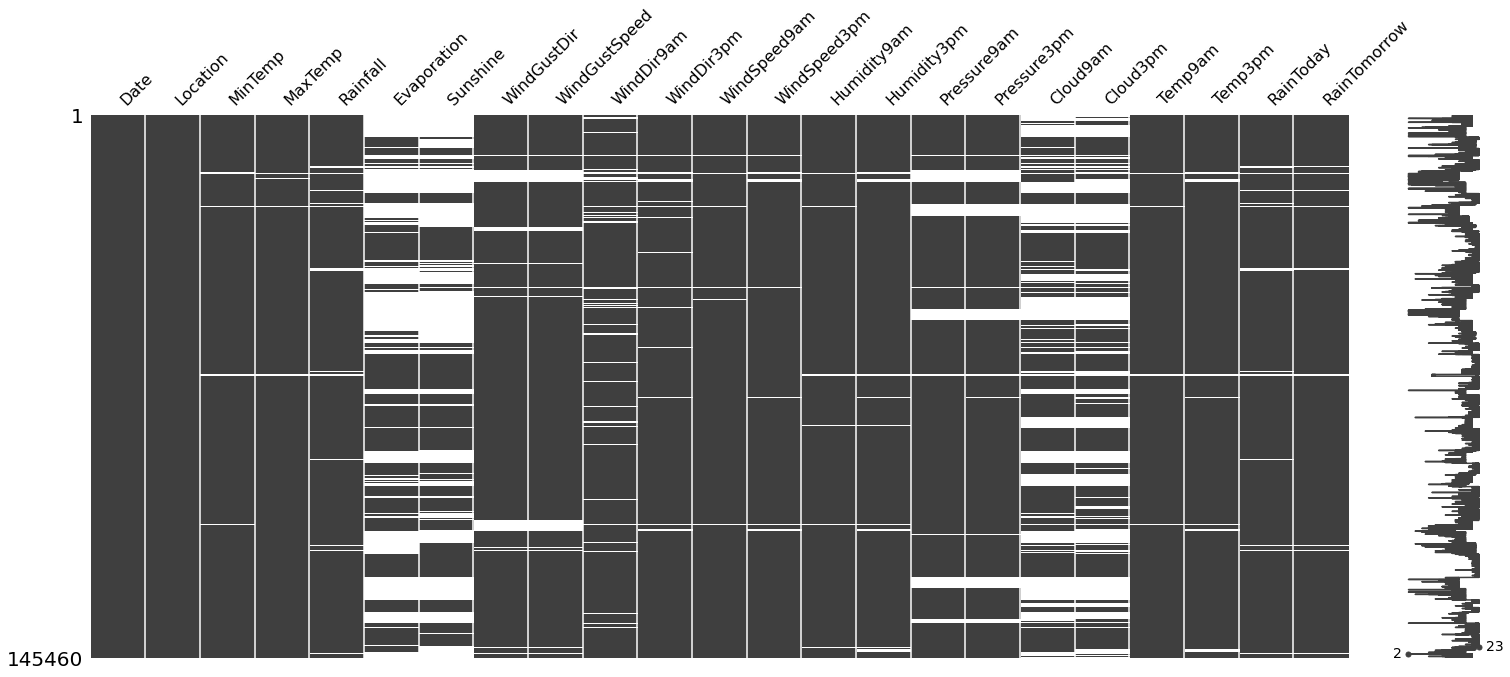

In [7]:
msno.matrix(df);

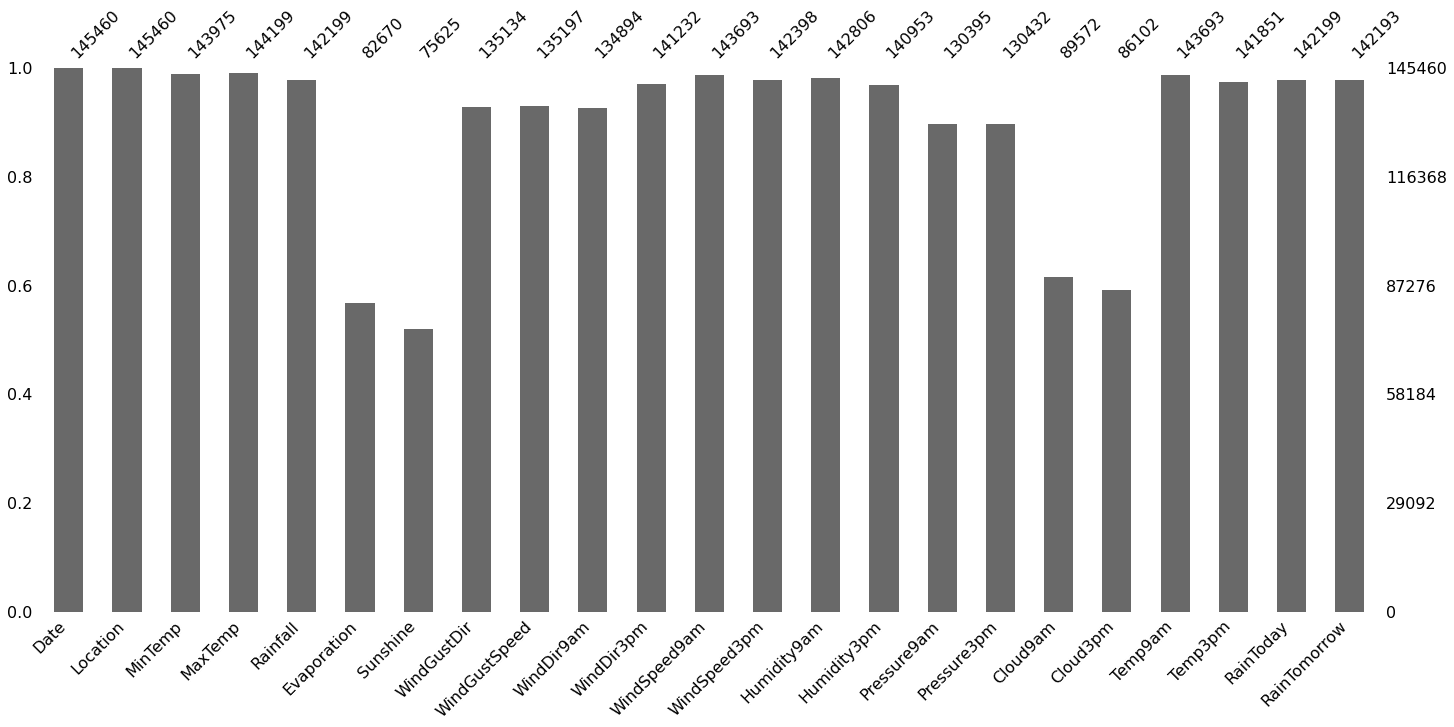

In [8]:
msno.bar(df);

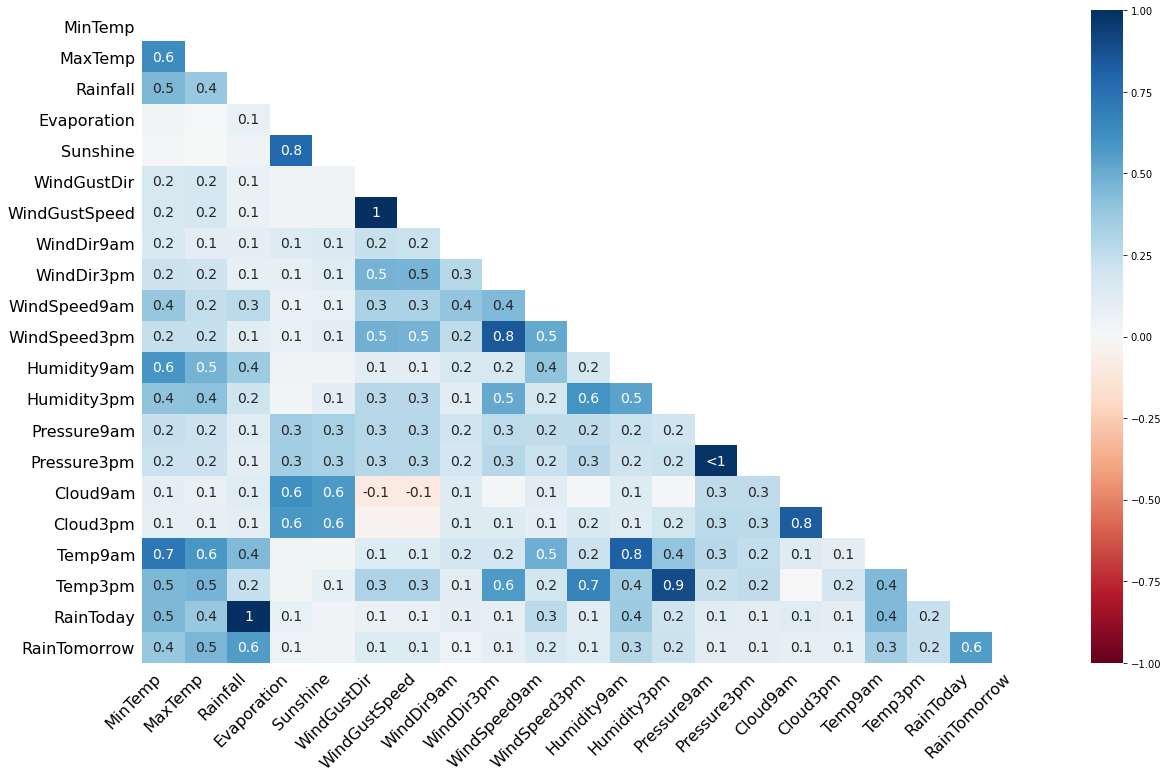

In [9]:
msno.heatmap(df);

In [11]:
features = ["RainToday","RainTomorrow"]
df.dropna(axis=0, subset=features, inplace=True)

In [12]:
miss = df.isnull().sum().sort_values(ascending = False)
miss_per = (miss/len(df))*100

In [13]:
pd.DataFrame({'No. missing values': miss, '% of missing data': miss_per.values})

,No. missing values,% of missing data
Sunshine,66805,47.451114
Evaporation,59694,42.400222
Cloud3pm,56094,39.843167
Cloud9am,52625,37.379161
Pressure3pm,13769,9.780022
Pressure9am,13743,9.761555
WindDir9am,9660,6.861429
WindGustDir,9163,6.508413
WindGustSpeed,9105,6.467216
WindDir3pm,3670,2.606775


In [15]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
df["RainToday_label"] = lbe.fit_transform(df["RainToday"])
df["RainTomorrow_label"] = lbe.fit_transform(df["RainTomorrow"])

In [16]:
df.drop(['Location','WindDir9am','WindDir3pm'], axis=1, inplace=True) 

df = pd.get_dummies(df, drop_first=True, columns = ['WindGustDir'], 
                   prefix = ['WindGustDir'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                140787 non-null  object 
 1   MinTemp             140319 non-null  float64
 2   MaxTemp             140480 non-null  float64
 3   Rainfall            140787 non-null  float64
 4   Evaporation         81093 non-null   float64
 5   Sunshine            73982 non-null   float64
 6   WindGustSpeed       131682 non-null  float64
 7   WindSpeed9am        139732 non-null  float64
 8   WindSpeed3pm        138256 non-null  float64
 9   Humidity9am         139270 non-null  float64
 10  Humidity3pm         137286 non-null  float64
 11  Pressure9am         127044 non-null  float64
 12  Pressure3pm         127018 non-null  float64
 13  Cloud9am            88162 non-null   float64
 14  Cloud3pm            84693 non-null   float64
 15  Temp9am             140131 non-nul

In [17]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,2008-12-01,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,...,0,0,0,0,0,0,0,1,0,0
1,2008-12-02,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,...,0,0,0,0,0,0,0,0,1,0
2,2008-12-03,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,...,0,0,0,0,0,0,0,0,0,1
3,2008-12-04,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,...,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,...,0,0,0,0,0,0,0,1,0,0


In [24]:

df_imputation = df.drop(['Date','RainToday','RainTomorrow'], axis=1) 
index = df_imputation.index
columns = df_imputation.columns



In [26]:
from scipy import stats

#select numerical variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df.select_dtypes(include=numerics)

#calculate absolute z-score for each observation and filter z-score>3
z = np.abs(stats.zscore(df_numeric))
threshold = 3

print('list of outliers:', '\n', np.where(z > 3)[0], '\n', np.where(z > 3)[1])
print('number of outliers:', np.where(z > 3)[0].shape)

list of outliers: 
 [   292    427    448 ... 140608 140609 140721] 
 [2 2 2 ... 2 2 2]
number of outliers: (2409,)


In [29]:
Q1_MaxTemp = df.MaxTemp.quantile(0.25)
Q3_MaxTemp = df.MaxTemp.quantile(0.75)
IQR_MaxTemp = Q3_MaxTemp - Q1_MaxTemp
upper_MaxTemp = Q3_MaxTemp + 1.5 * IQR_MaxTemp
lower_MaxTemp = Q1_MaxTemp - 1.5 * IQR_MaxTemp
print(f"""
Q1_MaxTemp = {Q1_MaxTemp}
Q3_MaxTemp = {Q3_MaxTemp}
IQR_MaxTemp = {IQR_MaxTemp}
upper_MaxTemp = {upper_MaxTemp}
lower_MaxTemp = {lower_MaxTemp}
""")


Q1_MaxTemp = 17.9
Q3_MaxTemp = 28.3
IQR_MaxTemp = 10.400000000000002
upper_MaxTemp = 43.900000000000006
lower_MaxTemp = 2.2999999999999954



In [30]:
df.MaxTemp[df.MaxTemp>upper_MaxTemp].shape

(128,)

In [33]:
import plotly.express as px
fig = px.box(df, y="MaxTemp",)
fig.show()

In [34]:
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MinTemp                9.2
MaxTemp               10.4
Rainfall               0.8
Evaporation            4.8
Sunshine               5.8
WindGustSpeed         17.0
WindSpeed9am          12.0
WindSpeed3pm          11.0
Humidity9am           26.0
Humidity3pm           29.0
Pressure9am            9.4
Pressure3pm            9.6
Cloud9am               6.0
Cloud3pm               5.0
Temp9am                9.3
Temp3pm                9.8
RainToday_label        0.0
RainTomorrow_label     0.0
dtype: float64
